# LISTA 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import chirp, sawtooth, square, unit_impulse, spectrogram
from scipy.fft import fft, fftfreq
from PyEMD import EMD
import pandas as pd

### Zadanie 1
Przygotuj kod w Pythonie, który wygeneruje spektrogramy dla sygnałów z zadania 1 na liście 1.

In [2]:
def generate_signals(f=5, fs=1000):
    # Parametry sygnału
    t = np.linspace(0, 1, fs, endpoint=False)  # Oś czasu 1 sekunda

    # a) Sygnał sinusoidalny
    sin_wave = np.sin(2 * np.pi * f * t)

    # b) Sygnał prostokątny
    square_wave = square(2 * np.pi * f * t)  

    # c) Sygnał piłokształtny
    sawtooth_wave = sawtooth(2 * np.pi * f * t)  

    # d) Sygnał świergotliwy (chirp)
    chirp_wave = chirp(t, f0=f, f1=5*f, t1=1, method='linear')

    # e) Superpozycja sinusa i cosinusa
    superposition_wave = np.sin(2 * np.pi * f * t) + 0.5 * np.cos(2 * np.pi * 2 * f * t)

    # f) Impuls jednostkowy
    impulse_wave = unit_impulse(fs, idx=fs//2)

    signals = [sin_wave, square_wave, sawtooth_wave, chirp_wave, superposition_wave, impulse_wave]
    titles = [
        'Sygnał sinusoidalny',
        'Sygnał prostokątny',
        'Sygnał piłokształtny',
        'Sygnał świergotliwy (chirp)',
        'Superpozycja sinusa i cosinusa',
        'Impuls jednostkowy'
    ]

    return t, signals, titles

In [4]:
def draw_spectograms(function, f=5, fs=1000):
    t, signals, titles = function(f, fs)
    

    fig, axs = plt.subplots(3, 2, figsize=(12, 8))
    for i, signal in enumerate(signals):
        ax = axs[i // 2, i % 2]
        f_spec, t_spec, Sxx = spectrogram(signal, fs)
        ax.pcolormesh(t_spec, f_spec, Sxx, shading='gouraud')
        ax.set_title(titles[i])
        ax.set_ylabel('Częstotliwość [Hz]')
        ax.set_xlabel('Czas [s]')
        ax.set_ylim(0, 2*f)  # Ograniczenie do 2*f
        
    plt.tight_layout()
    

f_slider = widgets.IntSlider(min=1, max=20, step=1, value=5, description="f [Hz]")
fs_slider = widgets.IntSlider(min=100, max=2000, step=100, value=1000, description="fs [Hz]")

display(widgets.interactive(draw_spectograms, function=widgets.fixed(generate_signals), f=f_slider, fs=fs_slider))

interactive(children=(IntSlider(value=5, description='f [Hz]', max=20, min=1), IntSlider(value=1000, descripti…

### Zadanie 2
Przygotuj w Pythonie kod bazując na pakiecie emd, który dokona dekompozycji sygnału świergotliwego (chirp) oraz wyznaczy widmo każdej mody.

In [5]:
def make_emd(function, f=5, fs=1000):
    t, signals, titles = function(f, fs)
    
    
    for signal, title in zip(signals, titles):
        # Dekompzycja EMD
        emd = EMD()
        imfs = emd.emd(signal, t)

        # Rysowanie IMF i ich widm
        if len(imfs) == 0:
            print("Brak IMF do wyświetlenia.")
            continue
        fig, axs = plt.subplots(len(imfs), 2, figsize=(10, 2 * len(imfs)))
        if len(imfs) == 1:
            axs = np.expand_dims(axs, axis=0)  # zapewnij indeksowanie [i, 0] dla 1 IMF
        for i, imf in enumerate(imfs):
            # IMF w dziedzinie czasu
            axs[i, 0].plot(t, imf)
            axs[i, 0].set_title(f'IMF {i+1}')
            axs[i, 0].set_xlabel('Czas [s]')
            axs[i, 0].set_ylabel('Amplituda')
            fig.suptitle(title)

            # Widmo IMF
            N = len(imf)
            freqs = fftfreq(N, 1/fs)
            spectrum = np.abs(fft(imf))
            axs[i, 1].plot(freqs[:N//2], spectrum[:N//2])
            axs[i, 1].set_title(f'Widmo IMF {i+1}')
            axs[i, 1].set_xlabel('Częstotliwość [Hz]')
            axs[i, 1].set_ylabel('Amplituda')
        plt.tight_layout()
        plt.show()
        
    

f_slider_emd = widgets.IntSlider(min=1, max=20, step=1, value=5, description="f [Hz]")
fs_slider_emd = widgets.IntSlider(min=100, max=2000, step=100, value=1000, description="fs [Hz]")

display(widgets.interactive(make_emd, function = widgets.fixed(generate_signals), f=f_slider_emd, fs=fs_slider_emd))

interactive(children=(IntSlider(value=5, description='f [Hz]', max=20, min=1), IntSlider(value=1000, descripti…

### Zadanie 3
Przygotuj w Pythonie kod bazując na pakiecie emd, który dokona dekompozycji dowolnie zbudowanego sygnału będącego superpozycją kilku funkcji sinus i cosinus. Wyznacz widmo każdej z mod

In [6]:
def make_superpositions(f=5, fs=1000):
    t = np.linspace(0, 1, fs, endpoint=False)
    signals = []
    titles = []

    # Przykład 1: sin(2πft) + cos(2π2ft)
    signals.append(np.sin(2 * np.pi * f * t) + np.cos(2 * np.pi * 2 * f * t))
    titles.append('sin(2πft) + cos(2π2ft)')

    # Przykład 2: 0.7*sin(2πft) + 0.3*cos(2π3ft)
    signals.append(0.7 * np.sin(2 * np.pi * f * t) + 0.3 * np.cos(2 * np.pi * 3 * f * t))
    titles.append('0.7*sin(2πft) + 0.3*cos(2π3ft)')

    # Przykład 3: sin(2πft) + 0.5*sin(2π4ft) + 0.2*cos(2π6ft)
    signals.append(np.sin(2 * np.pi * f * t) + 0.5 * np.sin(2 * np.pi * 4 * f * t) + 0.2 * np.cos(2 * np.pi * 6 * f * t))
    titles.append('sin(2πft) + 0.5*sin(2π4ft) + 0.2*cos(2π6ft)')

    # Przykład 4: cos(2πft) + cos(2π2ft) + sin(2π5ft)
    signals.append(np.cos(2 * np.pi * f * t) + np.cos(2 * np.pi * 2 * f * t) + np.sin(2 * np.pi * 5 * f * t))
    titles.append('cos(2πft) + cos(2π2ft) + sin(2π5ft)')

    return t, signals, titles

In [7]:
f_slider_emd = widgets.IntSlider(min=1, max=20, step=1, value=5, description="f [Hz]")
fs_slider_emd = widgets.IntSlider(min=100, max=2000, step=100, value=1000, description="fs [Hz]")

display(widgets.interactive(make_emd, function = widgets.fixed(make_superpositions), f=f_slider_emd, fs=fs_slider_emd))

interactive(children=(IntSlider(value=5, description='f [Hz]', max=20, min=1), IntSlider(value=1000, descripti…

### Zadanie 4
Przygotuj w Pythonie kod bazując na pakiecie emd, który dokona dekompozycji sygnału załadowanego z pliku np. csv. Wyznacz widmo każdej z mod.

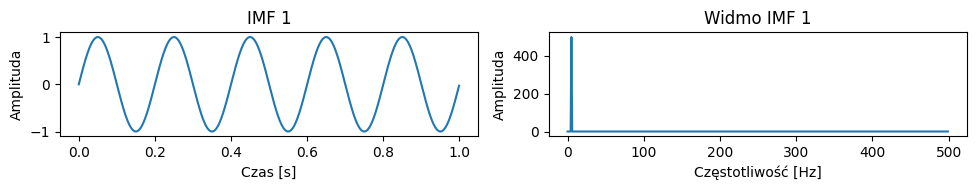

In [8]:
def make_emd_csv(data, fs=1000):
    
    t = np.linspace(0, len(data) / fs, len(data), endpoint=False)  # Oś czasu na podstawie fs i długości danych

    # Dekompzycja EMD
    emd = EMD()
    imfs = emd.emd(data, t)

    # Rysowanie IMF i ich widm
    if len(imfs) == 0:
        print("Brak IMF do wyświetlenia.")
        return

    fig, axs = plt.subplots(len(imfs), 2, figsize=(10, 2 * len(imfs)))
    if len(imfs) == 1:
        axs = np.expand_dims(axs, axis=0)  # zapewnij indeksowanie [i, 0] dla 1 IMF
    for i, imf in enumerate(imfs):
        # IMF w dziedzinie czasu
        axs[i, 0].plot(t, imf)
        axs[i, 0].set_title(f'IMF {i+1}')
        axs[i, 0].set_xlabel('Czas [s]')
        axs[i, 0].set_ylabel('Amplituda')

        # Widmo IMF
        N = len(imf)
        freqs = fftfreq(N, 1/fs)
        spectrum = np.abs(fft(imf))
        axs[i, 1].plot(freqs[:N//2], spectrum[:N//2])
        axs[i, 1].set_title(f'Widmo IMF {i+1}')
        axs[i, 1].set_xlabel('Częstotliwość [Hz]')
        axs[i, 1].set_ylabel('Amplituda')

    plt.tight_layout()
    plt.show()

plik = str(input('Podaj nazwę pliku: '))
signal = pd.read_csv(plik)
make_emd_csv(signal['amplituda'].to_numpy())
